###  TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type 
#### 가 발생하는 경우가 있습니다. 이것은 pandas 버전과 numpy의 버전이 맞지않은 경우에 발생합니다.
#### 위의 에러가 발생하는 경우에는, 
#### (1) pip 버전 업그레이드 : (anaconda prompt "관리자권한 실행" 후) python.exe -m pip install --upgrade pip
#### (2) pandas 버전 업그레이드 : (Jupyter Notebook "관리자권한 실행" 후) !pip install pandas --upgrade
#### (3) numpy 버전 업그레이드 :  (Jupyter Notebook "관리자권한 실행" 후) !pip install numpy --upgrade
#### 를 하시기 바랍니다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 7장. 통계분석

# [1] 와인 품질 등급 예측하기

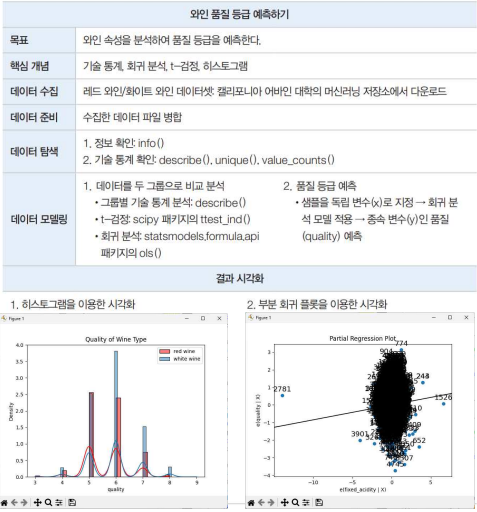
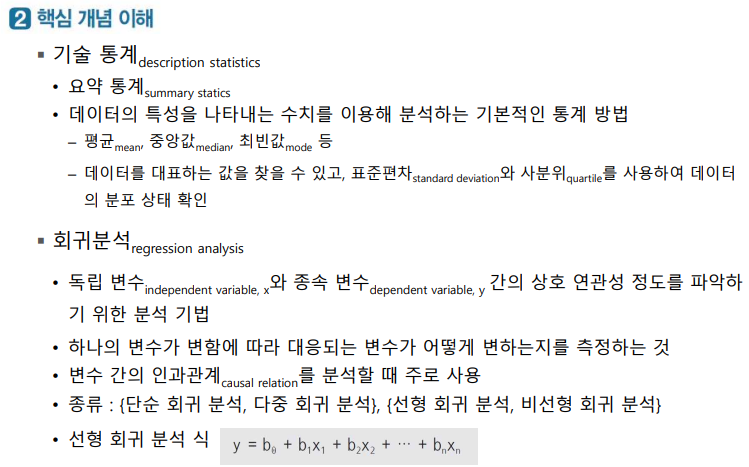
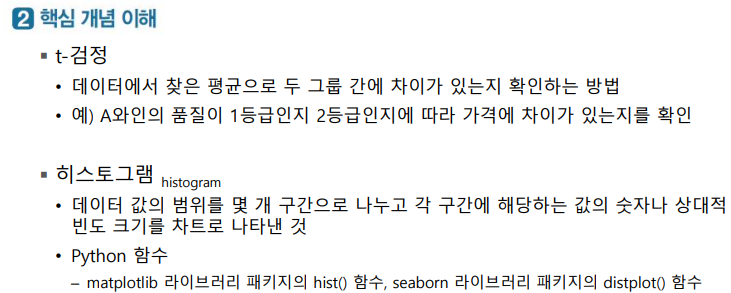

#### p.201
## 4. 데이터준비
### 4.1 다운로드한 CSV 파일 정리하기

In [6]:
import pandas as pd

In [8]:
red_df = pd.read_csv('./7장_data/winequality-red.csv', sep = ';', header = 0, engine = 'python')

In [10]:
white_df = pd.read_csv('./7장_data/winequality-white.csv', sep = ';', header = 0, engine= 'python')

In [12]:
red_df.to_csv('./7장_data/winequality-red2.csv',index = False)

In [14]:
white_df.to_csv('./7장_data/winequality-white2.csv', index = False)

### 4.2 데이터 병합하기

In [18]:
red_df.info()
'''
- 행이 1,599개이므로 샘플이 1,599개
- 열이 12개
- 입력 변수는 11개 속성
- 출력 변수는 quality이다.
    - quality는 와인의 품질 등급을 나타냄
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


'\n- 행이 1,599개이므로 샘플이 1,599개\n- 열이 12개\n- 입력 변수는 11개 속성\n- 출력 변수는 quality이다.\n    - quality는 와인의 품질 등급을 나타냄\n'

In [20]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
# 레드와인 종류 구분을 위해 type 컬럼 추가 _insert()
red_df.insert(0, column = 'type', value = 'red')

In [24]:
red_df.head()  #작업 확인용 출력

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
red_df.shape

(1599, 13)

In [11]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
# 화이트 와인 종류 구분을 위해 type 컬럼 추가 _insert()
white_df.insert(0, column = 'type', value = 'white')

In [30]:
white_df.head()    #작업 확인용 출력

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
white_df.shape

(4898, 13)

In [34]:
# 레드와인과 화이트와인 파일 합치기 _concat()
wine = pd.concat([red_df, white_df])

In [36]:
wine.shape

(6497, 13)

In [38]:
wine.to_csv('./7장_data/wine.csv', index = False)

## 5. 데이터 탐색

In [40]:
wine.info()
'''
- 전체 샘플은 6497개이고 속성을 나타내는 열은 13개
- 각 속성의 이름은 type부터 quality까지 속성 중에서
    - 실수 타입(float64) : 11개
    - 정수 타입(int64) : 1개
    - 객체 타입(object) : 1개
- 독립 변수(x)는 type부터 alcohol까지, 종속 변수(y)는 1개(quality)
'''

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


#### 컬럼이름의 띄어쓰기를 밑줄로 바꾸기

In [42]:
wine.columns = wine.columns.str.replace(' ', '_')

In [44]:
wine.head()  #작업 확인용 출력

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
'''
describe()함수를 사용하여 속성별 개수, 평균, 표준편차, 최소값, 전체 데이터 백분율에 대한
25번째 백분위수(25%), 중앙값이 50번째 백분위수(50%), 75번째 백분위수(75%) 그리고 100번째 백분위수인 최댓값max을 출력
'''
wine.describe

<bound method NDFrame.describe of        type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0       red            7.4              0.70         0.00             1.9   
1       red            7.8              0.88         0.00             2.6   
2       red            7.8              0.76         0.04             2.3   
3       red           11.2              0.28         0.56             1.9   
4       red            7.4              0.70         0.00             1.9   
...     ...            ...               ...          ...             ...   
4893  white            6.2              0.21         0.29             1.6   
4894  white            6.6              0.32         0.36             8.0   
4895  white            6.5              0.24         0.19             1.2   
4896  white            5.5              0.29         0.30             1.1   
4897  white            6.0              0.21         0.38             0.8   

      chlorides  free_sulfur_dioxide  tot

In [48]:
# wine.quality.unique()함수를 통해 quality속성값 중에서 '유일한 값'을 출력
# -> 이를 통해 와인 품질 등급 quality은 3,4,5,6,7,8,9의 7개의 등급이 있다는 것을 알 수 있음
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [52]:
# quality.value_counts()함수를 통해 quality 속성값에 대한 '빈도수'를 보여줌
# -> 6등급인 샘플이 2,836개로 가장 많고, 9등급인 샘플이 5개로 가장 적은 것을 알 수 있음
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

## 6. 데이터 모델링

### 6.1 describe( ) 함수로 그룹 비교하기

In [56]:
# 레드 와인과 화이트 와인을 구분하는 속성인 type을 기준으로 그룹을 나눈 뒤, 그룹 안에서 quality 속성을 기준으로 기술 통계를 구함
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [58]:
# mean()함수로 평균 구함
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [60]:
# std()함수로 표준편차 구함
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [62]:
# mean()함수와 std()함수를 묶어서 한번에 사용할 때는 'agg()'함수 사용
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


### 6.2 t-검정과 회귀 분석으로 그룹 비교하기

In [64]:
# 통계 라이브러리 설치 : 한번만 실행
# 회귀 분석을 위해서는 statsmodels 라이브러리 패키지를 사용
!pip install statsmodels

In [66]:
# t검정을 위해서는 scipy 라이브러리 패키지를 사용
from scipy import stats

In [68]:
# t검정에 필요한 scipy 패키지의 stats 함수와
# 회귀 분석에 필요한 statsmodels.formula.api 패키지의 ols, glm 함수를 로드
from statsmodels.formula.api import ols, glm

In [70]:
# 레드 와인 샘플의 quality 값만 찾아서 red_wine에 저장
# .loc[]는 pandas의 데이터프레임에서 특정 행과 열을 선택할 때 사용.
# .loc[]는 행과 열을 동시에 지정할 수 있으며, 대괄호 안에 [행 조건, 열 선택] 형식으로 작정됨
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']

In [72]:
# 화이트 와인 샘플의 quality 값만 찾아서 white_wine에 저장
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

In [76]:
# scipy 패키지의 stats.ttets_ind()함수를 사용하여 t검정을 하고 두 그룹 간 차이를 확인
# red_wine_quality : 첫번째 그룹 / white_wine_quality : 두번째 그룹
# equal_var = False : 두 그룹의 분산이 같이 않다고 가정하는 경우.
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

'''
ttest_ind()함수는 TtestResult 객체를 반환하며, 여기에는 statistic, pvalue, df 세가지 정보가 포함됨
1. statistic: t-값 또는 t-통계량을 나타냅니다. 이 값은 두 그룹 간 평균의 차이를 나타내며, 
            값이 클수록 그룹 간 차이가 더 크다는 것을 의미합니다. 
            여기서 t-값은 -10.15로, 음수인 것은 첫 번째 그룹(레드 와인)의 평균이 두 번째 그룹(화이트 와인)의 평균보다 낮다는 것을 나타냅니다.
2. pvalue: p-값은 검정의 유의성을 확인하는 값입니다. 
            여기서 p-값은 8.16e-24로 매우 작은 값이 나왔습니다. 
            일반적으로 p-값이 0.05보다 작으면 귀무가설(두 그룹의 평균이 같다)을 기각하고, 두 그룹 간 평균의 차이가 통계적으로 유의미하다고 판단합니다. 
            이 경우 p-값이 매우 작으므로 두 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.
3. df: 자유도(degrees of freedom)를 나타냅니다. 여기서는 2950.75로 계산되었습니다.

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

In [78]:
# 선형 회귀 분석식의 종속 변수(y)와 독립 변수(x1 ~ x10)를 구성
'''
Rformula는 회귀 분석을 위한 회귀 방정식을 정의한 것
    - 종속 변수 : quality(와인의 품질 점수)
    - 독립 변수 : 나머지 값들..(와인의 화학적 특성들)
'''
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + \
            total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [80]:
# 선형 회귀 모델 중에서 OLS(Ordinary Least Squares) 모델을 사용
'''
- ols()함수는 '최소자승법(Ordinary Least Squares, OLS)'을 사용하여 선형 회귀를 분석 수행
- fit()메서드는 모델을 실제 데이터에 적합시키는 과정
    - data=wine : wine 데이터프레임을 사용해 모델을 적합시킴
'''
'''
[최소자승법?]
정의: 최소자승법은 회귀 분석에서 데이터와 회귀 직선 간의 거리를 최소화하는 방법입니다. 
    구체적으로, 실제 값과 모델이 예측한 값 간의 차이(잔차, residual)의 제곱합을 최소화하는 방식으로 회귀 계수를 추정합니다.
목적: 예측 값을 가능한 한 실제 값에 가깝게 맞추는 것이 목표입니다.
방법: 각 데이터 포인트의 실제 값과 예측 값 간의 차이(잔차)를 제곱하여 더한 값을 최소화하는 방향으로 회귀 계수를 결정합니다.
예시: y = ax + b에서 a와 b를 조정해 y 값이 x에 대해 가장 잘 맞는 직선을 찾는 방법입니다.
'''
regression_result = ols(Rformula, data = wine).fit()

In [82]:
# summary()는 선형 회귀 분석과 관련되 통계값을 출력
regression_result.summary()

'''
3.1. 모델 요약
- 종속 변수(Dep. Variable): quality (예측하고자 하는 변수)
- R-squared: 0.292 (독립 변수들이 종속 변수의 변동성을 약 29.2% 설명한다는 의미)
- Adjusted R-squared: 0.291 (R-squared의 수정된 값, 독립 변수의 수를 고려하여 조정됨)
- F-statistic: 243.3 (모델이 통계적으로 유의미한지 검정하는 값. F-statistic의 p-값(Prob)이 0.00이므로, 유의미한 모델임을 나타냄)
- No. Observations: 6497 (샘플의 개수)

3.2. 회귀 계수 (Coefficients)
- coef: 각 독립 변수의 회귀 계수입니다. 이 값이 크면 해당 독립 변수가 종속 변수에 큰 영향을 미친다는 의미입니다.
- std err: 회귀 계수의 표준 오차.
- t: 각 회귀 계수의 t-값.
- P>|t|: 각 독립 변수가 통계적으로 유의미한지에 대한 p-값. 일반적으로 0.05보다 작으면 유의미하다고 판단합니다.

3.3. 주요 독립 변수 해석
- volatile_acidity: -1.3279로 음수. 이는 volatile_acidity가 높을수록 quality가 감소한다는 것을 의미합니다. p-값이 0.000이므로 매우 유의미한 변수입니다.
- alcohol: 0.2670로 양수. 이는 알코올 함량이 높을수록 품질이 상승한다는 것을 의미하며, p-값이 0.000으로 유의미합니다.
- density: -54.9669로 음수. 밀도가 높을수록 품질이 감소한다는 것을 의미하며, p-값은 0.000으로 유의미합니다.

3.4. 기타 통계량
- Omnibus 및 Jarque-Bera: 데이터의 정규성 검정. p-값이 0.000으로, 잔차가 정규분포를 따르지 않을 가능성을 시사합니다.
- Durbin-Watson: 잔차의 자기상관 검정. 1.646으로, 2에 가까운 값이면 잔차에 자기상관이 없다는 것을 나타냅니다.

종합
- 이 회귀 모델은 와인 품질에 영향을 미치는 다양한 화학적 요소를 고려하여 품질을 예측하려고 합니다. 
- R-squared가 0.292로 높은 설명력을 가지지는 않지만, 여러 독립 변수들이 품질에 유의미한 영향을 미치는 것을 확인할 수 있습니다.
'''

'''
[모르는 용어?]
1. 유의미(Statistical Significance)
정의: 통계적으로 유의미하다는 것은 관찰된 결과가 우연이 아니라 특정 요인에 의해 발생한 것이라는 증거가 충분하다는 의미입니다. 
    통계 검정에서는 주로 p-값을 통해 유의미 여부를 판단합니다.
p-값: 특정 가설(예: 두 그룹의 평균이 같다)이 옳다는 전제하에, 관측된 데이터보다 극단적인 결과가 나올 확률입니다. 
    일반적으로 p-값이 0.05 이하면 결과가 유의미하다고 판단합니다.
예시: p-값이 0.01이라면, 해당 결과가 우연히 발생할 확률은 1%에 불과하다는 의미이며, 이는 결과가 유의미하다고 해석됩니다.

2. 정규분포(Noraml Distribution)
정의: 정규분포는 대칭적인 종 모양의 분포로, 평균을 중심으로 데이터가 고르게 퍼져 있는 확률 분포입니다.
특징:
    평균, 중앙값, 최빈값이 모두 동일한 값.
    데이터가 평균값을 중심으로 대칭적으로 분포.
    대부분의 데이터(약 68%)가 평균에서 ±1 표준편차 범위 내에 존재하며, 약 95%는 ±2 표준편차 범위 내에 존재합니다.
중요성: 정규분포는 많은 통계 기법의 전제 조건이며, 실생활에서 많은 데이터들이 정규분포를 따릅니다.
예시: 사람의 키, 시험 점수 등은 대체로 정규분포를 따르는 경향이 있습니다.

3. 잔차의 자기상관 검정(Residual Autocorrelation Test)
정의: 잔차의 자기상관 검정은 회귀 분석에서 잔차(오차)가 서로 상관관계가 있는지를 검정하는 방법입니다.
    - 자기상관이 없다는 것은 각 데이터의 오차가 독립적이라는 의미이며, 이는 회귀 분석의 중요한 가정 중 하나입니다.
    - 자기상관이 있으면 회귀 모델이 정확한 예측을 할 수 없으며, 모델의 신뢰성이 떨어집니다.
Durbin-Watson 검정: 회귀 분석에서 잔차의 자기상관 여부를 확인하는 대표적인 검정 방법입니다. 
                이 검정은 잔차가 1차 자기상관이 있는지 여부를 확인하며, 검정 결과 값이 2에 가까울수록 잔차에 자기상관이 없다고 판단합니다.
                -> 값이 0에 가까울수록 잔차에 양의 자기상관이 있음을 나타내고, 4에 가까울수록 음의 자기상관이 있음을 나타냅니다.
예시: 시간에 따라 측정된 데이터(예: 주식 가격)에서 잔차가 자기상관을 가질 가능성이 큽니다. 이전 시간의 오차가 다음 시간의 오차에 영향을 미칠 수 있기 때문입니다.
'''

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:43:58   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6.3 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

[예측에 사용할 첫번째 샘플 데이터 만들기]

In [91]:
# wine에서 quality와 type 열은 제외하고, 회귀 분석 모델에 사용할 독립 변수만 추출하여 sample1에 저장
sample1 = wine[wine.columns.difference(['quality', 'type'])]

In [93]:
# sample1에 있는 샘플 중에서 0~4번 5개 샘플만 추출하고, sample1에 다시 저장하여 예측에 사용할 샘플을 제작
sample1 = sample1[0:5][:]

[첫번째 샘플의 quality 예측하기]

In [96]:
# 샘플 데이터를 회귀 분석 모델 regression_result의 예측 함수 predict()에 적용하여 수행한 뒤 결과 예측값을 sample_predict에 저장
sample1_predict = regression_result.predict(sample1)

In [98]:
# sample1_predict를 출력하여 예측한 quality를 확인
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [100]:
# wine에서 0번부터 4번까지 샘플의 quality 값을 출력하여 sample1_predict에 맞게 예측되었는지 확인
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

#### - 결과값 비교 및 해석

0번부터 4번까지 샘플에 대해 예측한 품질 값 vs. 실제 품질 값

샘플 0: 예측값 4.997607, 실제값 5 → 거의 정확하게 예측.
<br>
샘플 1: 예측값 4.924993, 실제값 5 → 예측값이 실제값보다 약간 낮지만, 큰 차이는 아님.
<br>
샘플 2: 예측값 5.034663, 실제값 5 → 거의 정확하게 예측.
<br>
샘플 3: 예측값 5.680333, 실제값 6 → 예측값이 실제값보다 조금 낮음.
<br>
샘플 4: 예측값 4.997607, 실제값 5 → 거의 정확하게 예측.

<br>
모델이 전반적으로 샘플의 품질을 꽤 정확하게 예측하고 있습니다. 

대부분의 예측 값이 실제 값과 근접하며, 특히 0번, 2번, 4번 샘플은 거의 정확히 예측되었습니다. 
<br>
그러나 3번 샘플에서는 실제 품질 값 6에 비해 예측 값이 약간 낮았습니다.

### - 임의의 data로 샘플 만들기

[예측에 사용할 두 번째 샘플 데이터 만들기]

In [122]:
# 회귀식에 사용한 독립 변수에 대입할 임의의 값을 딕셔너리 형태로 제작
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],
"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,
0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,
99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],
"alcohol":[9.0, 0.88]}

In [124]:
# 딕셔너리 형태의 값과 sample1의 열 이름만 뽑아 데이터프레임으로 묶은 sample2를 제작
sample2 = pd.DataFrame(data, columns= sample1.columns)

In [126]:
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


[두 번째 샘플의 quality 예측하기]

In [129]:
# 샘플 데이터를 회귀 분석 모델 regression_result의 예측 함수 predict()에 적용하여 수행한 뒤 결과 예측값을 저장
sample2_predict = regression_result.predict(sample2)

In [133]:
# sample2_predict를 출력하여 예측한 quality를 확인
sample2_predict

0    4.809094
1    7.582129
dtype: float64

## 7. 결과 시각화

### 7.1 와인 유형에 따른 품질 등급 히스토그램 그리기

In [135]:
#  라이브러리 설치 : 한번만 실행
# 시각화에 필요한 패키지를 로드
!pip install seaborn

In [136]:
import matplotlib.pyplot as plt

In [138]:
import seaborn as sns

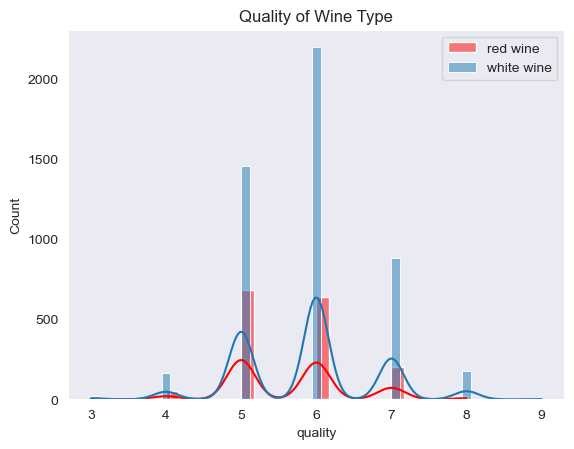

In [143]:
sns.set_style('dark') # 히스토그램 차트의 배경색 스타일 설정
sns.histplot(red_wine_quality, kde = True, color = "red", label = 'red wine') #레드와인에 대한 histplot객체 생성
sns.histplot(white_wine_quality, kde = True, label = 'white wine') # 화이트와인에 대한 histplot객체 생성
plt.title("Quality of Wine Type")
plt.legend() # 차트 범례 설정
plt.show()

# x축 : quality / y축 : 확률 밀도 함수값

### 7.2 부분 회귀 플롯으로 시각화하기

 독립 변수가 2개 이상인 경우에는 부분 회귀 플롯을 사용하여 하나의 독립 변수가 종속 변수에
미치는 영향력을 시각화 함으로써 결과를 분석할 수 있음

In [152]:
import statsmodels.api as sm

### - fixed_acidity가 종속 변수 quality에 미치는 영향력을 시각화하기

In [154]:
# 부분 회귀에 사용할 독립 변수 fixed_acidity와 종속 변수를 제외한 나머지 변수 이름을 리스트 others로 추출
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

'\n[결과 분석]\n중심에 데이터가 몰리는 이유: 대다수의 데이터가 다른 변수들에 의해 설명될 수 있으며, fixed_acidity가 그다지 큰 영향을 미치지 않는 경우입니다. \n즉, fixed_acidity가 크게 변하지 않으면서 종속 변수에 미치는 순수한 영향이 작기 때문에 대부분의 데이터가 x=0에 모입니다.\n극단적인 값들: 극단적인 값은 특정 데이터에서 fixed_acidity의 순수한 영향이 다른 변수들에 비해 매우 크거나 작은 경우로, \n이러한 데이터는 다른 변수들과의 관계를 제거했을 때 고립된 형태로 나타날 수 있습니다. \n이는 해당 변수의 특이한 상호작용이나 데이터 자체의 특성 때문일 수 있습니다.\n'

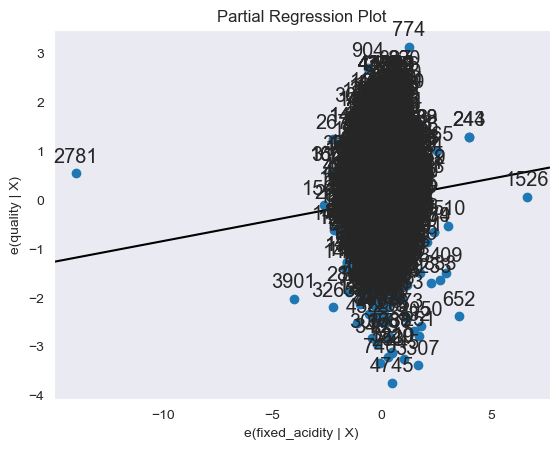

In [156]:
# 나머지 변수는 고정하고 fixed_acidity가 종속 변수 quality에 미치는 영향에 부분회귀를 수행
# 부분 회귀의 결과를 플롯으로 시각화하여 나타냄
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)

'''
[결과 분석]
- 중심에 데이터가 몰리는 이유: 대다수의 데이터가 다른 변수들에 의해 설명될 수 있으며, fixed_acidity가 그다지 큰 영향을 미치지 않는 경우입니다. 
즉, fixed_acidity가 크게 변하지 않으면서 종속 변수에 미치는 순수한 영향이 작기 때문에 대부분의 데이터가 x=0에 모입니다.

- 극단적인 값들: 극단적인 값은 특정 데이터에서 fixed_acidity의 순수한 영향이 다른 변수들에 비해 매우 크거나 작은 경우로, 
이러한 데이터는 다른 변수들과의 관계를 제거했을 때 고립된 형태로 나타날 수 있습니다. 
이는 해당 변수의 특이한 상호작용이나 데이터 자체의 특성 때문일 수 있습니다.
'''

### - 각 독립 변수가 종속 변수 quality에 미치는 영향력을 시각화하기

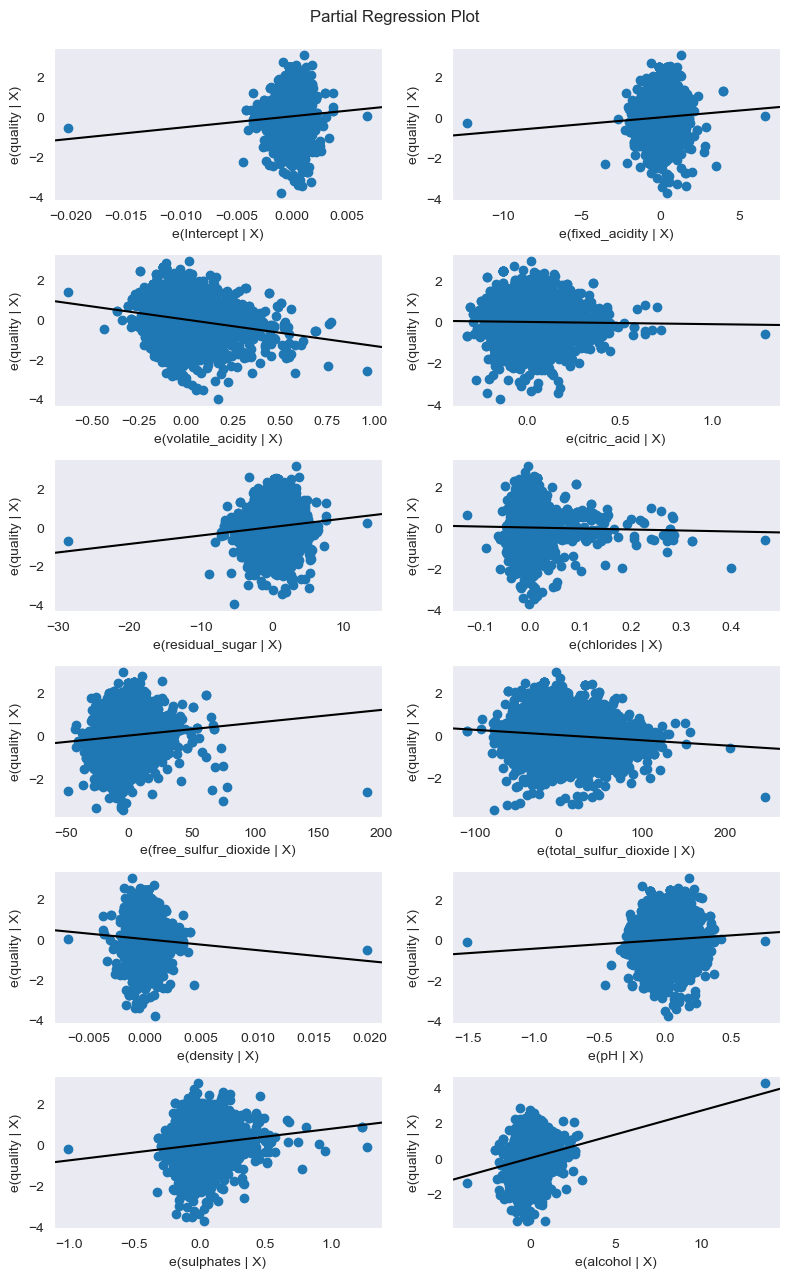

In [158]:
fig = plt.figure(figsize = (8, 13))

# 다중 선형 회귀 분석 결과를 가지고 있는 regression_result를 이용해 각 독립 변수의 부분 회귀 플롯 구함
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

#### - 전반적인 해석
각 플롯에서 x축은 해당 독립 변수(X | others)의 잔차, y축은 quality | others의 잔차입니다. 잔차는 다른 변수의 영향을 통제한 후 남은 부분으로, 두 변수 간의 순수한 관계를 나타냅니다.
<br>

[플롯별 분석]
<br>
Intercept (절편):<br>
데이터가 0 근처에 집중되어 있으며, y축(quality의 잔차)이 선형으로 약간 증가하는 모습을 보입니다. 
<br>
절편은 종속 변수인 quality의 평균 값을 나타내며, 독립 변수들의 영향이 없는 상태에서의 quality 예측값을 반영합니다.
<br>
<br>
fixed_acidity:<br>
x축이 -10에서 5까지 분포하며 대부분의 데이터가 0 근처에 몰려 있습니다. 약간의 양의 선형 관계를 보이지만 큰 변화는 없습니다. 
<br>
이는 fixed_acidity가 quality에 미치는 영향이 그리 크지 않다는 것을 시사합니다.
<br>
<br>
volatile_acidity:<br>
x축이 -0.5에서 1.0 사이에 분포하며, 음의 선형 관계를 보여줍니다. volatile_acidity가 증가할수록 quality는 감소하는 경향이 있습니다. 
<br>
이는 volatile_acidity가 와인 품질에 부정적인 영향을 미칠 수 있다는 것을 나타냅니다.
<br>
<br>
citric_acid:<br>
데이터가 0 근처에 모여 있으며 거의 상관관계가 없는 것으로 보입니다. citric_acid가 quality에 미치는 영향이 크지 않음을 의미합니다.
<br>
<br>
residual_sugar:<br>
x축이 -30에서 10까지 퍼져 있으며, 양의 선형 관계를 보여줍니다. 
<br>
이는 residual_sugar(잔류 당도)가 높을수록 quality가 증가하는 경향이 있음을 나타냅니다.
<br>
<br>
chlorides:<br>
chlorides는 거의 0 근처에 데이터가 몰려 있고 선형 관계는 거의 보이지 않습니다. 
<br>
이는 염화물이 quality에 미치는 영향이 매우 미미하거나 거의 없음을 나타냅니다.
<br>
<br>
free_sulfur_dioxide:<br>
데이터가 고르게 분포되어 있으며 약한 양의 선형 관계가 나타납니다. free_sulfur_dioxide가 증가할수록 quality가 약간 증가하는 경향이 있습니다.
<br>
<br>
total_sulfur_dioxide:<br>
약한 음의 선형 관계가 보입니다. 이는 total_sulfur_dioxide(총 아황산염)가 많을수록 quality가 약간 감소하는 경향이 있음을 의미합니다.
<br>
<br>
density:<br>
음의 선형 관계가 분명하게 나타나고 있습니다. density가 높을수록 quality가 감소하는 경향을 보여줍니다. 이는 와인의 밀도가 높을수록 품질이 떨어질 가능성을 나타냅니다.
<br>
<br>
pH:<br>
약한 양의 선형 관계가 보입니다. 이는 pH 값이 증가할수록 quality가 약간 증가하는 경향이 있음을 시사합니다.
<br>
<br>
sulphates:<br>
양의 선형 관계가 뚜렷하게 나타납니다. sulphates(황산염 농도)가 높을수록 quality도 높아지는 경향이 있습니다. 
<br>
이는 황산염 농도가 와인의 품질에 긍정적인 영향을 미친다는 것을 보여줍니다.
<br>
<br>
alcohol:<br>
alcohol 역시 강한 양의 선형 관계를 보입니다. 이는 알코올 함량이 높을수록 quality가 증가하는 경향을 나타냅니다. 
<br>
알코올은 와인 품질에 중요한 영향을 미치는 요인임을 시사합니다.
<br>
<br>
<br>
종합적인 해석:<br>
volatile_acidity, density, total_sulfur_dioxide는 quality에 음의 영향을 미치는 주요 변수입니다.
<br>
residual_sugar, free_sulfur_dioxide, sulphates, alcohol은 quality에 긍정적인 영향을 미치는 변수입니다.
<br>
citric_acid, chlorides, pH는 quality와 큰 상관관계가 없는 것으로 보입니다.

------------------------------------------

# [2] 상관분석 + 히트맵
#      타이타닉호 생존율 분석하기

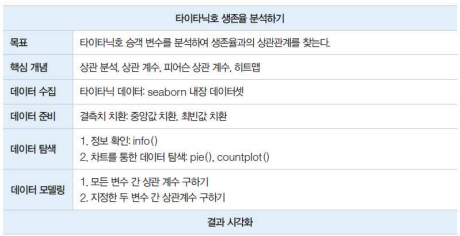

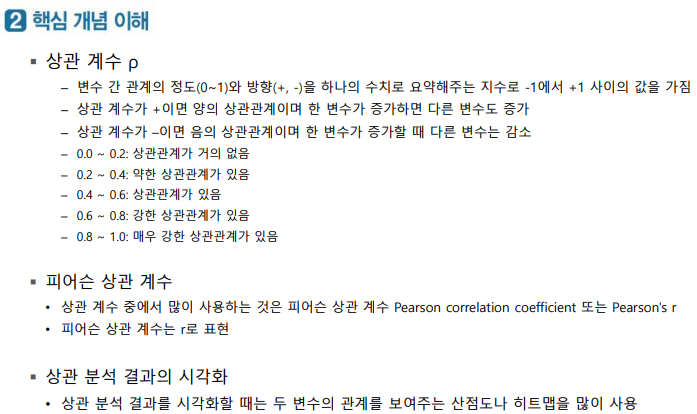

## 3. 데이터 수집

In [163]:
import seaborn as sns

In [165]:
import pandas as pd

In [167]:
titanic = sns.load_dataset("titanic")

In [169]:
titanic.to_csv('./7장_data/titanic.csv', index = False)

## 4. 데이터 준비

#### - 결측값 있는지 확인하기

In [173]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### - age 열의 결측값을 중앙값으로 치환하기

In [176]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

#### - embarked 열의 결측값을 최빈값으로 치환하기

In [179]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [181]:
titanic['embarked'] = titanic['embarked'].fillna('S')

#### - embark_town 열의 결측값을 최빈값으로 치환하기

In [187]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [189]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

#### - deck 열의 결측값을 최빈값으로 치환하기

In [192]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [194]:
titanic['deck'] = titanic['deck'].fillna('C')

#### - 결측치가 다 채워졌는지 확인하기

In [197]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## 5. 데이터 탐색

### 5.1 데이터의 기본 정보 탐색하기

In [199]:
# 타이타닉 데이터의 기본 정보 확인
titanic.info()

'''
- 전체 샘플의 수: 891개이고 속성은 15개
– 샘플 891명 중에서 생존자는 342명이고 사망자는 549명
– pclass, class: 객실 등급
– sibsp: 함께 탑승한 형제자매와 배우자 수
– parch: 함께 탑승한 부모/자식 수
– embarked, embark_town: 탑승 항구
– adult_male: 성인 남자 여부
– alone: 동행 여부를 True/False로 나타냄
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


'\n- 전체 샘플의 수: 891개이고 속성은 15개\n– 샘플 891명 중에서 생존자는 342명이고 사망자는 549명\n– pclass, class: 객실 등급\n– sibsp: 함께 탑승한 형제자매와 배우자 수\n– parch: 함께 탑승한 부모/자식 수\n– embarked, embark_town: 탑승 항구\n– adult_male: 성인 남자 여부\n– alone: 동행 여부를 True/False로 나타냄\n'

In [203]:
# survived 속성값의 빈도를 확인
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

### 5.2 차트를 그려 데이터를 시각적으로 탐색하기

In [205]:
import matplotlib.pyplot as plt

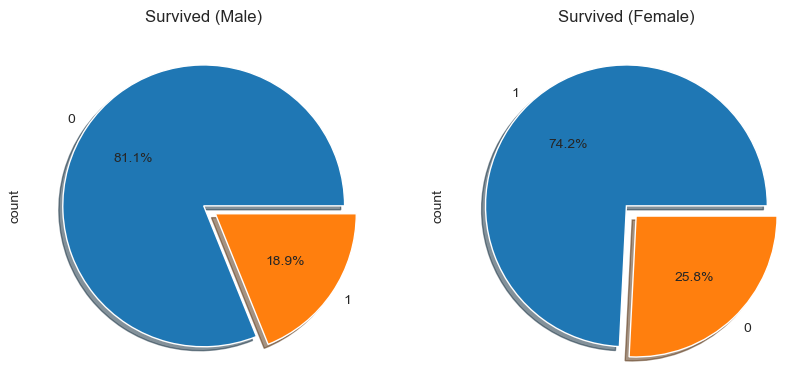

'\n 남자 승객과 여자 승객의 생존율을 pie 차트로 그리기\n– 02행 한 줄에 두 개의 차트를 그리도록 하고 크기를 설정\n– 03행 첫 번째 pie 차트는 남자 승객의 생존율을 나타내도록 설정\n– 04행 두 번째 pie 차트는 여자 승객의 생존율을 나타내도록 설정\n– 05행 첫 번째 차트의 제목을 설정\n– 06행 두 번째 차트의 제목을 설정\n– 07행 구성한 차트를 나타낸다.\n'

In [209]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

'''
 남자 승객과 여자 승객의 생존율을 pie 차트로 그리기
– 02행 한 줄에 두 개의 차트를 그리도록 하고 크기를 설정
– 03행 첫 번째 pie 차트는 남자 승객의 생존율을 나타내도록 설정
– 04행 두 번째 pie 차트는 여자 승객의 생존율을 나타내도록 설정
– 05행 첫 번째 차트의 제목을 설정
– 06행 두 번째 차트의 제목을 설정
– 07행 구성한 차트를 나타낸다.
'''
# 결과 : 남자 승객 생존율 : 18.9% / 여자 승객 생존율 : 74.2%

### 5.3 등급별 생존자 수를 차트로 나타내기

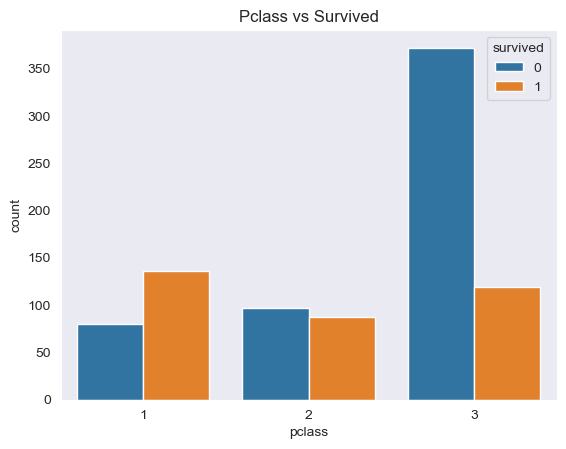

'\n– 01행 pclass 유형 1,2,3을 x축으로 하고 survived =0과 survived =1의 개수를 계산하여 y축으로 하는 countplot을 설정\n– 02행 차트 제목을 설정\n– 03행 구성한 차트를 나타냄\n– 생존자(1)는 1등급에서 가장 많음\n– 사망자(0)는 3등급에서 월등히 많음\n'

In [213]:
sns.countplot(x='pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

'''
– 01행 pclass 유형 1,2,3을 x축으로 하고 survived =0과 survived =1의 개수를 계산하여 y축으로 하는 countplot을 설정
– 02행 차트 제목을 설정
– 03행 구성한 차트를 나타냄
– 생존자(1)는 1등급에서 가장 많음
– 사망자(0)는 3등급에서 월등히 많음
'''

## 6. 데이터 모델링

### 6.1 상관분석을 위한 상관계수를 구하고 저장하기

In [215]:
# 자료형(dtype)이 int, float, boolean 인 것만 추출해서 tianic2에 저장
titanic2 = titanic.select_dtypes(include=[int, float,bool]) 

# titanic2의 구조를 출력하여 숫자형태의 자료형을 갖는 8개 속성만 추출된 것을 확인
titanic2.shape

(891, 8)

In [217]:
# 피어슨 상관 계수를 적용하여 상관 계수를 구함
titanic_corr = titanic2.corr(method = 'pearson')

In [219]:
# 상관 계수 출력
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [221]:
titanic_corr.to_csv('./7장_data/titanic_corr.csv', index = False)

### 6.2 상관계수 확인하기 

#### - 저장한 titanic_corr.csv 파일을 열어서 저장된 상관계수를 확인해본다

– 남자 성인(adult_male): 생존(survived)과 음의 상관관계
<br>
– 객실 등급(pclass): 음의 상관<br>

– 관계, 객실 요금fare은 양의 상관관<br>
계
– 동행 없이 혼자 탑승한 경우(alone): 생존율이 떨어진다는 상관관계

### 6.3 특정 변수 사이의 상관계수 구하기 

In [228]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053255

In [230]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849623

## 7. 결과 시각화

### 7.1 산점도로 상관 분석 시각화하기 

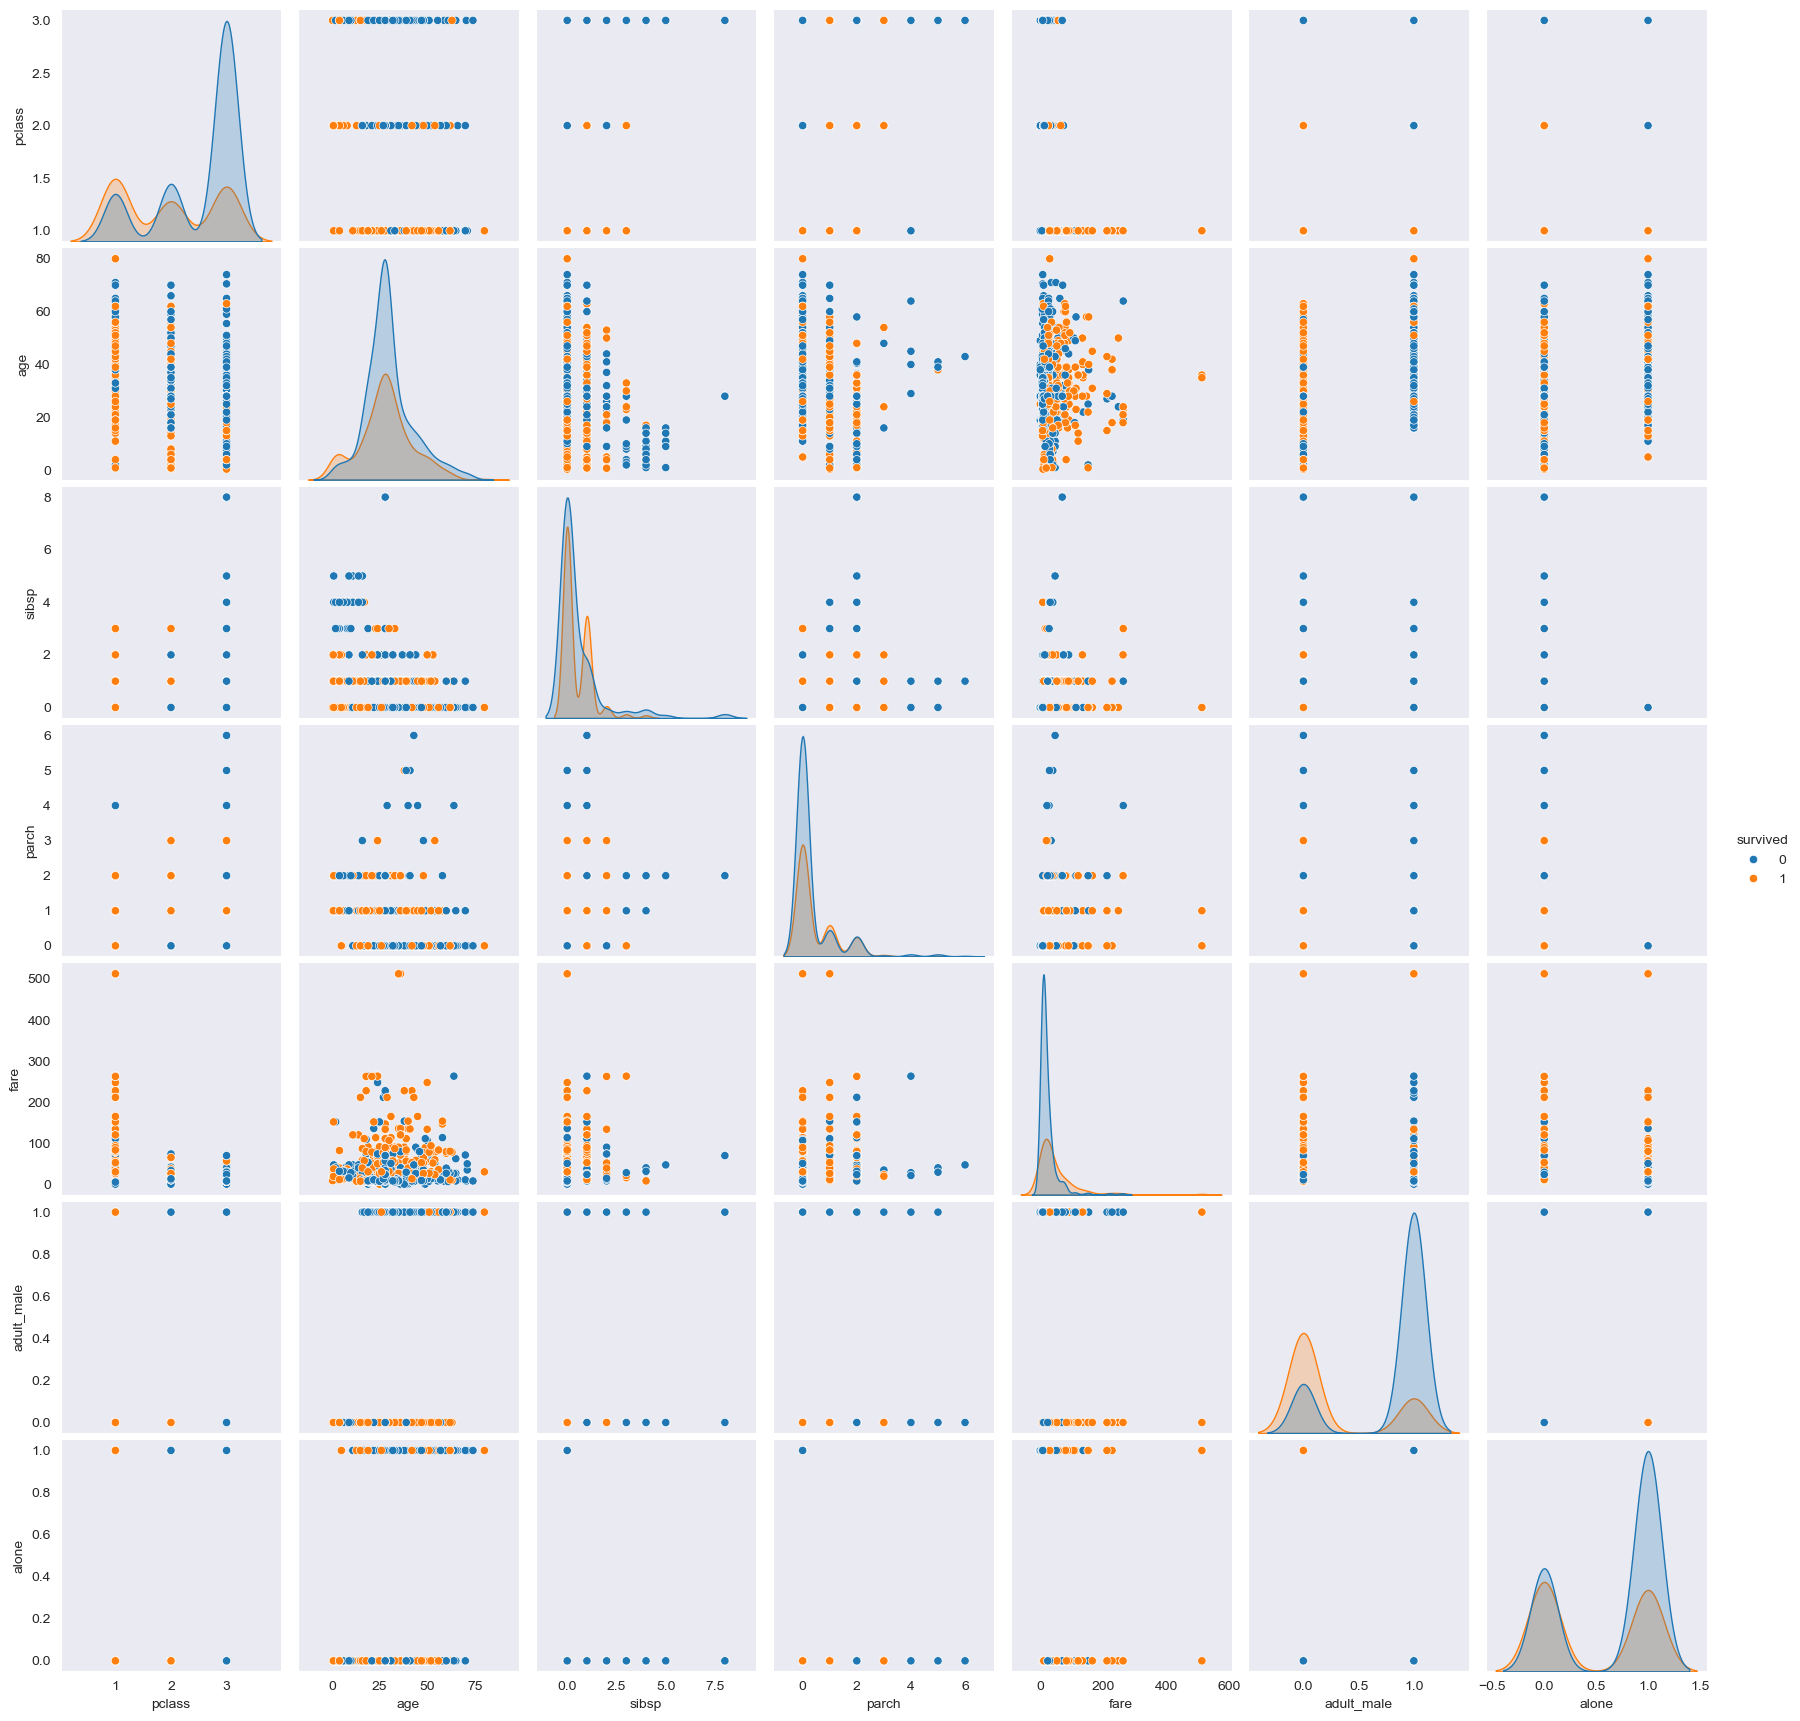

In [234]:
sns.pairplot(titanic, hue = 'survived')

plt.show()

### 7.2 두 변수의 상관관계 시각화하기

#### - 객실 등급과 생존의 상관관계를 seaborn 패키지의 catplot으로 시각화해보자

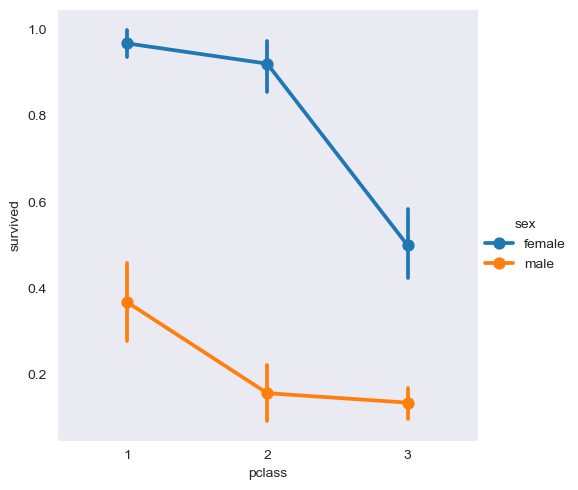

In [238]:
#행 catplot() 함수를 사용하여 pclass와 survived 변수의 관계를 차트로 그림
#hue인자를 이용하여 종속 변수를 sex로 지정
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

plt.show()

### 7.3 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [256]:
# 10살 단위로 등급을 나누어 0~7의 값으로 바꿔주는 category_age함수 작성
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [270]:
# category_age 함수를 적용하여 새로운 age2 열 만들어 추가
titanic['age2'] = titanic['age'].apply(category_age)

In [272]:
# 성별을 male/female에서 1/0으로 치환
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [274]:
# 가족의 수를 구하여 family 열 추가
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [264]:
titanic.to_csv('./7장_data/titanic3.csv', index = False)

In [266]:
# 히트맵에 사용할 데이터 추출
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

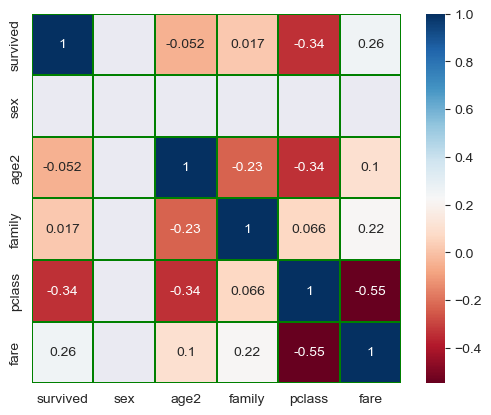

In [268]:
#히트맵에 사용할 색상맵을 지정
colormap = plt.cm.RdBu

#corr()함수로 구한 상관 계수로
히트맵을 생성
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'green', annot = True,
annot_kws = {"size": 10})

plt.show()